# R Notebook with Data & Stats

In [1]:
library(dplyr)
library(ggplot2)
library(lme4)
library(wesanderson)
setwd("C:/Users/joann/Downloads")


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


## Add data

<font color='blue'>Let's Go </font> <font color='#F07000'>Mets! </font>

This set of data comes from https://www.baseball-reference.com/teams/NYM/2015-schedule-scores.shtml

The data contains stats for the Mets' 2015 season


In [31]:
df<- read.csv("baseball.csv")
df %>%                                         # Apply filter & complete.cases
  filter(complete.cases(.))
df$Game <- df$ï..Game
head(df)

ï..Game,Date,Team,Advantage,Opp,WinLoss,Runs,RunsAllowed,ExtraInnings,W.L,Rank,GamesBack,WinningPitcher,LosingPitcher,Save,Duration,D.N,Attendance,cLI,Streak
39,"Monday, May 18",NYM,Home,STL,W-wo,2,1,14,23-16,1,up 1.0,Torres,Tuivailala,,4:14,N,"23,338",1.28,+++
47,"Tuesday, May 26",NYM,Home,PHI,W-wo,5,4,10,26-21,2,1.5,Familia,Gomez,,3:17,N,"21,064",1.24,++
63,"Saturday, Jun 13",NYM,Home,ATL,L,3,5,11,33-30,1,up 0.5,Grilli,Torres,Perez,3:39,D,"37,734",1.70,-
65,"Monday, Jun 15",NYM,Home,TOR,W-wo,4,3,11,35-30,1,up 1.5,Robles,Cecil,,3:26,N,"22,172",1.30,++
76,"Saturday, Jun 27",NYM,Home,CIN,W-wo,2,1,13,39-37,2,3,Parnell,Adcock,,4:33,D,"32,531",1.19,+++
79,"Wednesday, Jul 1",NYM,Home,CHC,L,0,2,11,40-39,2,3.5,Motte,Torres,Grimm,3:40,N,"23,906",1.31,--
92,"Sunday, Jul 19",NYM,Away,STL,W,3,1,18,48-44,2,2,Torres,Martinez,,5:55,D,"43,194",1.35,+
99,"Sunday, Jul 26",NYM,Home,LAD,W-wo,3,2,10,51-48,2,2,Mejia,Nicasio,,3:27,D,"36,093",1.43,++
103,"Friday, Jul 31",NYM,Home,WSN,W-wo,2,1,12,53-50,2,2,Torres,Vazquez,,3:59,N,"36,164",2.22,+
116,"Friday, Aug 14",NYM,Home,PIT,L,2,3,10,63-53,1,up 4.5,Caminero,Parnell,Melancon,3:20,N,"38,495",1.32,-


ï..Game,Date,Team,Advantage,Opp,WinLoss,Runs,RunsAllowed,ExtraInnings,W.L,...,GamesBack,WinningPitcher,LosingPitcher,Save,Duration,D.N,Attendance,cLI,Streak,Game
1,"Monday, Apr 6",NYM,Away,WSN,W,3,1,NA,1-0,...,Tied,Colon,Scherzer,Carlyle,2:35,D,"42,295",1.05,+,1
2,"Wednesday, Apr 8",NYM,Away,WSN,L,1,2,NA,1-1,...,1.5,Zimmermann,deGrom,Storen,2:21,N,"25,999",1.11,-,2
3,"Thursday, Apr 9",NYM,Away,WSN,W,6,3,NA,2-1,...,1,Harvey,Strasburg,,2:54,D,"25,327",1.11,+,3
4,"Friday, Apr 10",NYM,Away,ATL,L,3,5,NA,2-2,...,2,Johnson,Montero,Grilli,3:01,N,"46,279",1.16,-,4
5,"Saturday, Apr 11",NYM,Away,ATL,L,3,5,NA,2-3,...,3,Teheran,Gee,Johnson,2:25,N,"36,056",1.16,--,5
6,"Sunday, Apr 12",NYM,Away,ATL,W,4,3,NA,3-3,...,2,Colon,Jaime,Familia,2:37,D,"28,192",1.08,+,6


## Organize data, then summarize data

In [40]:
df$Runs<-as.numeric(df$Runs)
df$RunsAllowed <- as.numeric(df$RunsAllowed)
df$Attendance<-as.numeric(df$Attendance)
df$Team <- as.factor(df$Team)
df$Advantage <- as.factor(df$Advantage)
df$Opp <- as.factor(df$Opp)
df$DayNight<-as.factor(df$D.N)
df$Game<-as.factor(df$Game)
sumDF <- df %>% group_by(Team, Advantage, DayNight) %>%
                    summarize(AverageRuns = mean(Runs),
                             Avg_RunsAllowed = mean(RunsAllowed),
                             Avg_Attendance = mean(Attendance))
    

In [38]:
sumDF

Team,Advantage,DayNight,AverageRuns,Avg_RunsAllowed,Avg_Attendance
NYM,Away,D,4.869565,3.304348,96.65217
NYM,Away,N,4.448276,4.258621,69.79310
NYM,Home,D,4.230769,3.423077,107.19231
NYM,Home,N,3.690909,3.654545,73.47273


## Summarize based on opposition

In [36]:
oppDF <- df %>% group_by(Team, Opp) %>%
                    summarize(AverageRuns = mean(Runs),
                             Avg_RunsAllowed = mean(RunsAllowed),
                             Avg_Attendance = mean(Attendance))
oppDF

Team,Opp,AverageRuns,Avg_RunsAllowed,Avg_Attendance
NYM,ARI,4.000000,3.000000,67.00000
NYM,ATL,4.526316,3.684211,71.36842
NYM,BAL,4.250000,2.750000,61.00000
NYM,BOS,3.333333,4.333333,133.66667
NYM,CHC,1.571429,3.857143,75.71429
NYM,CIN,6.714286,2.285714,62.57143
NYM,COL,8.000000,3.428571,97.85714
NYM,LAD,4.714286,2.714286,131.00000
NYM,MIA,4.789474,4.210526,59.42105
NYM,MIL,4.000000,2.666667,67.16667


## Graph some data!

### Show scatter plot of runs throughout the year

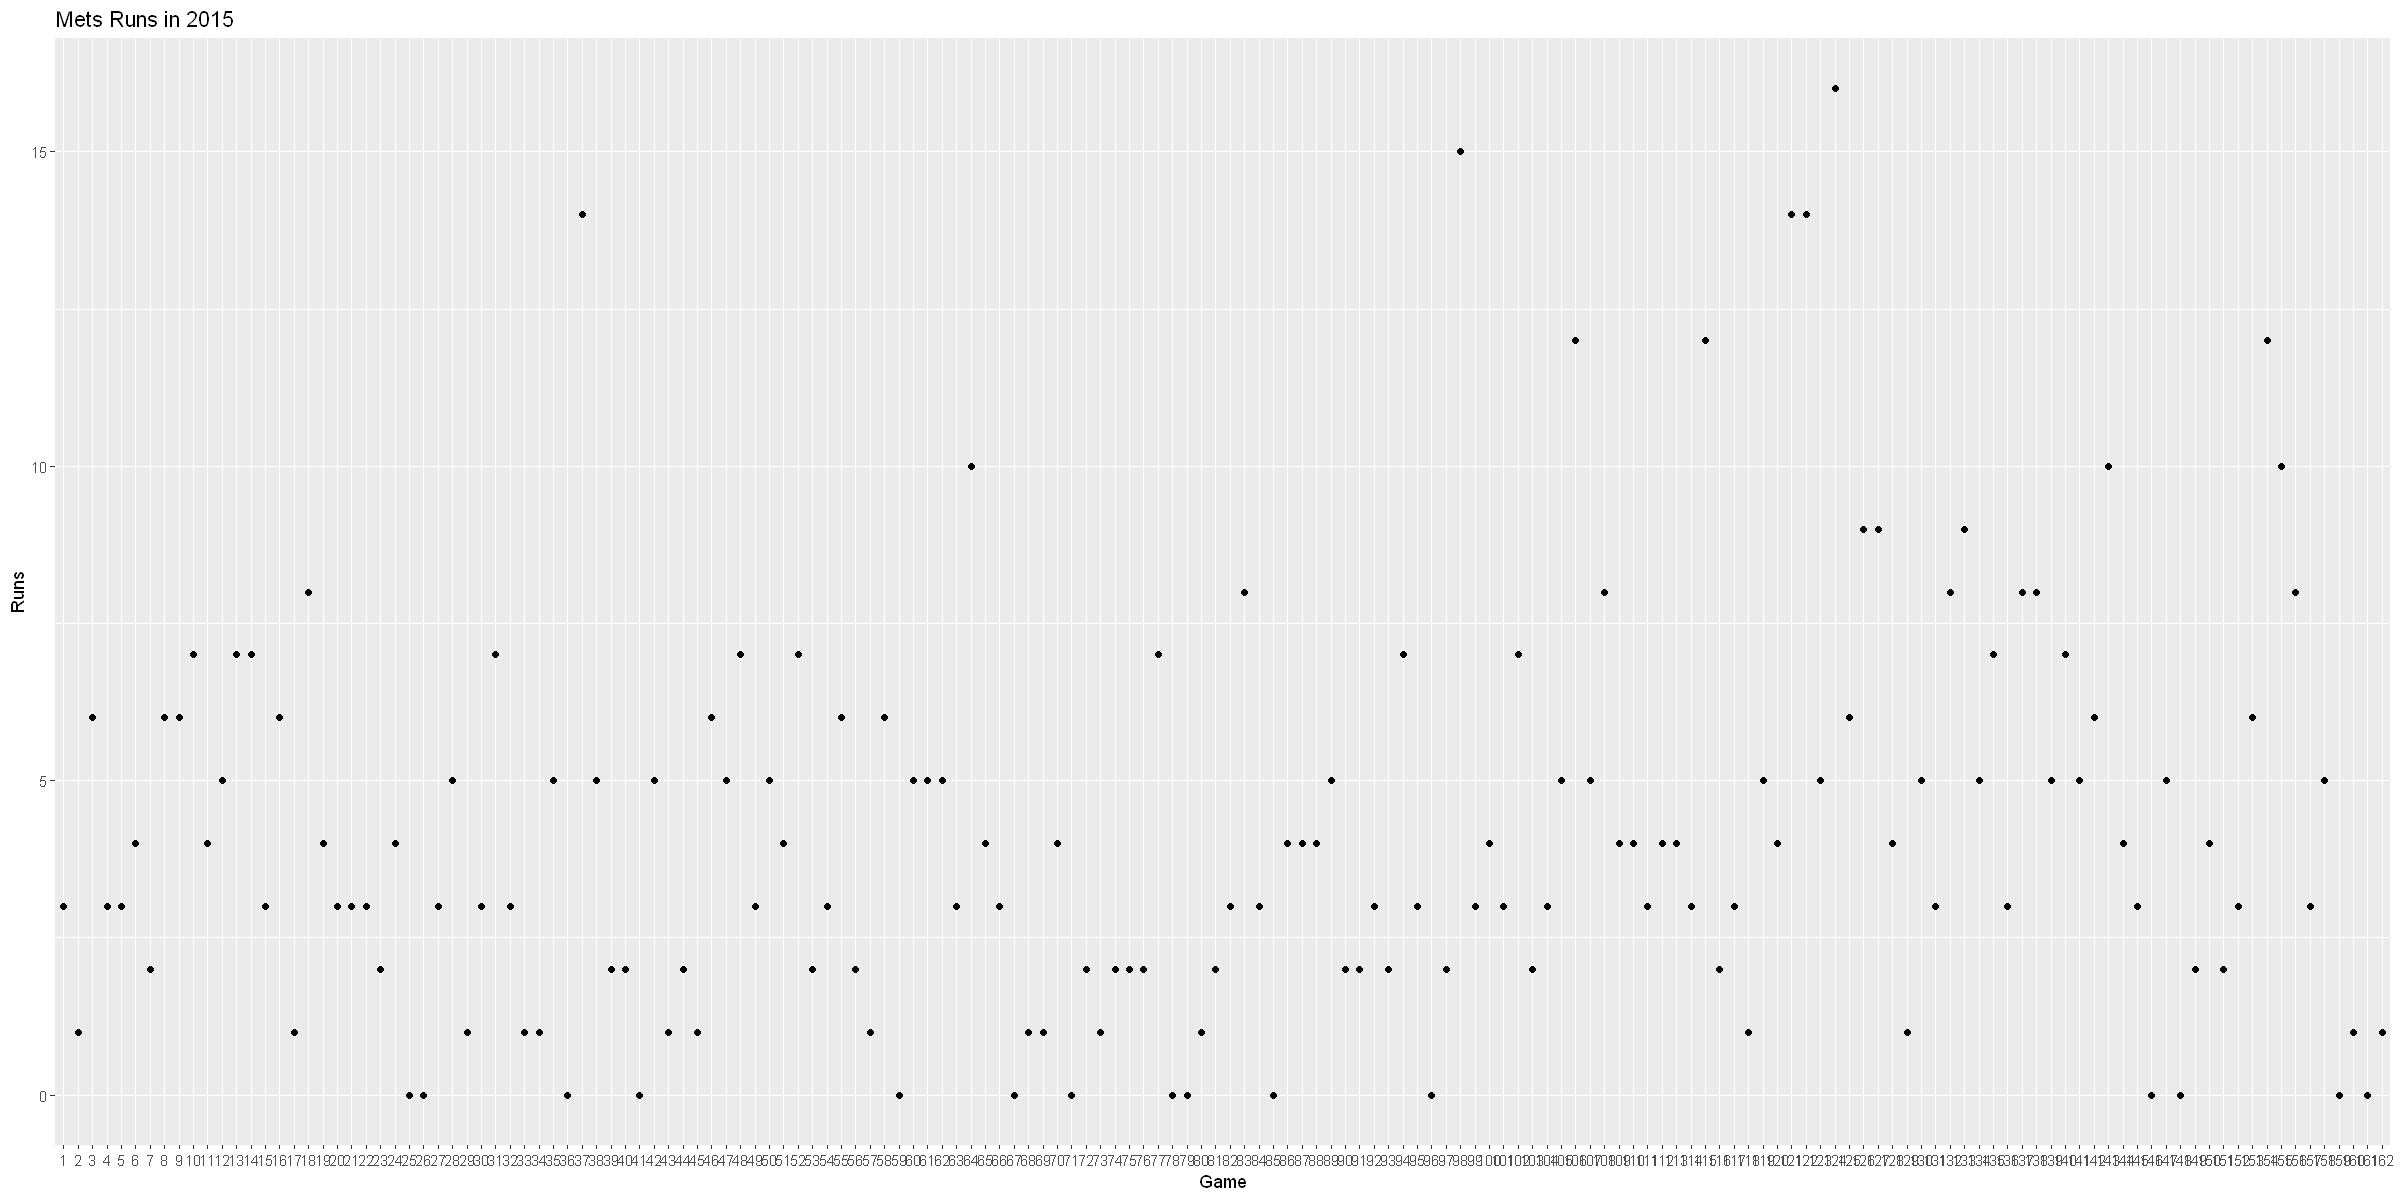

In [50]:
options(repr.plot.width=20, repr.plot.height=10)

df %>%
    ggplot(aes(x=Game, y=Runs))+
    geom_point()+
    ggtitle("Mets Runs in 2015")

### Spice it up a bit

Use home/away as color factor, then change size by runs

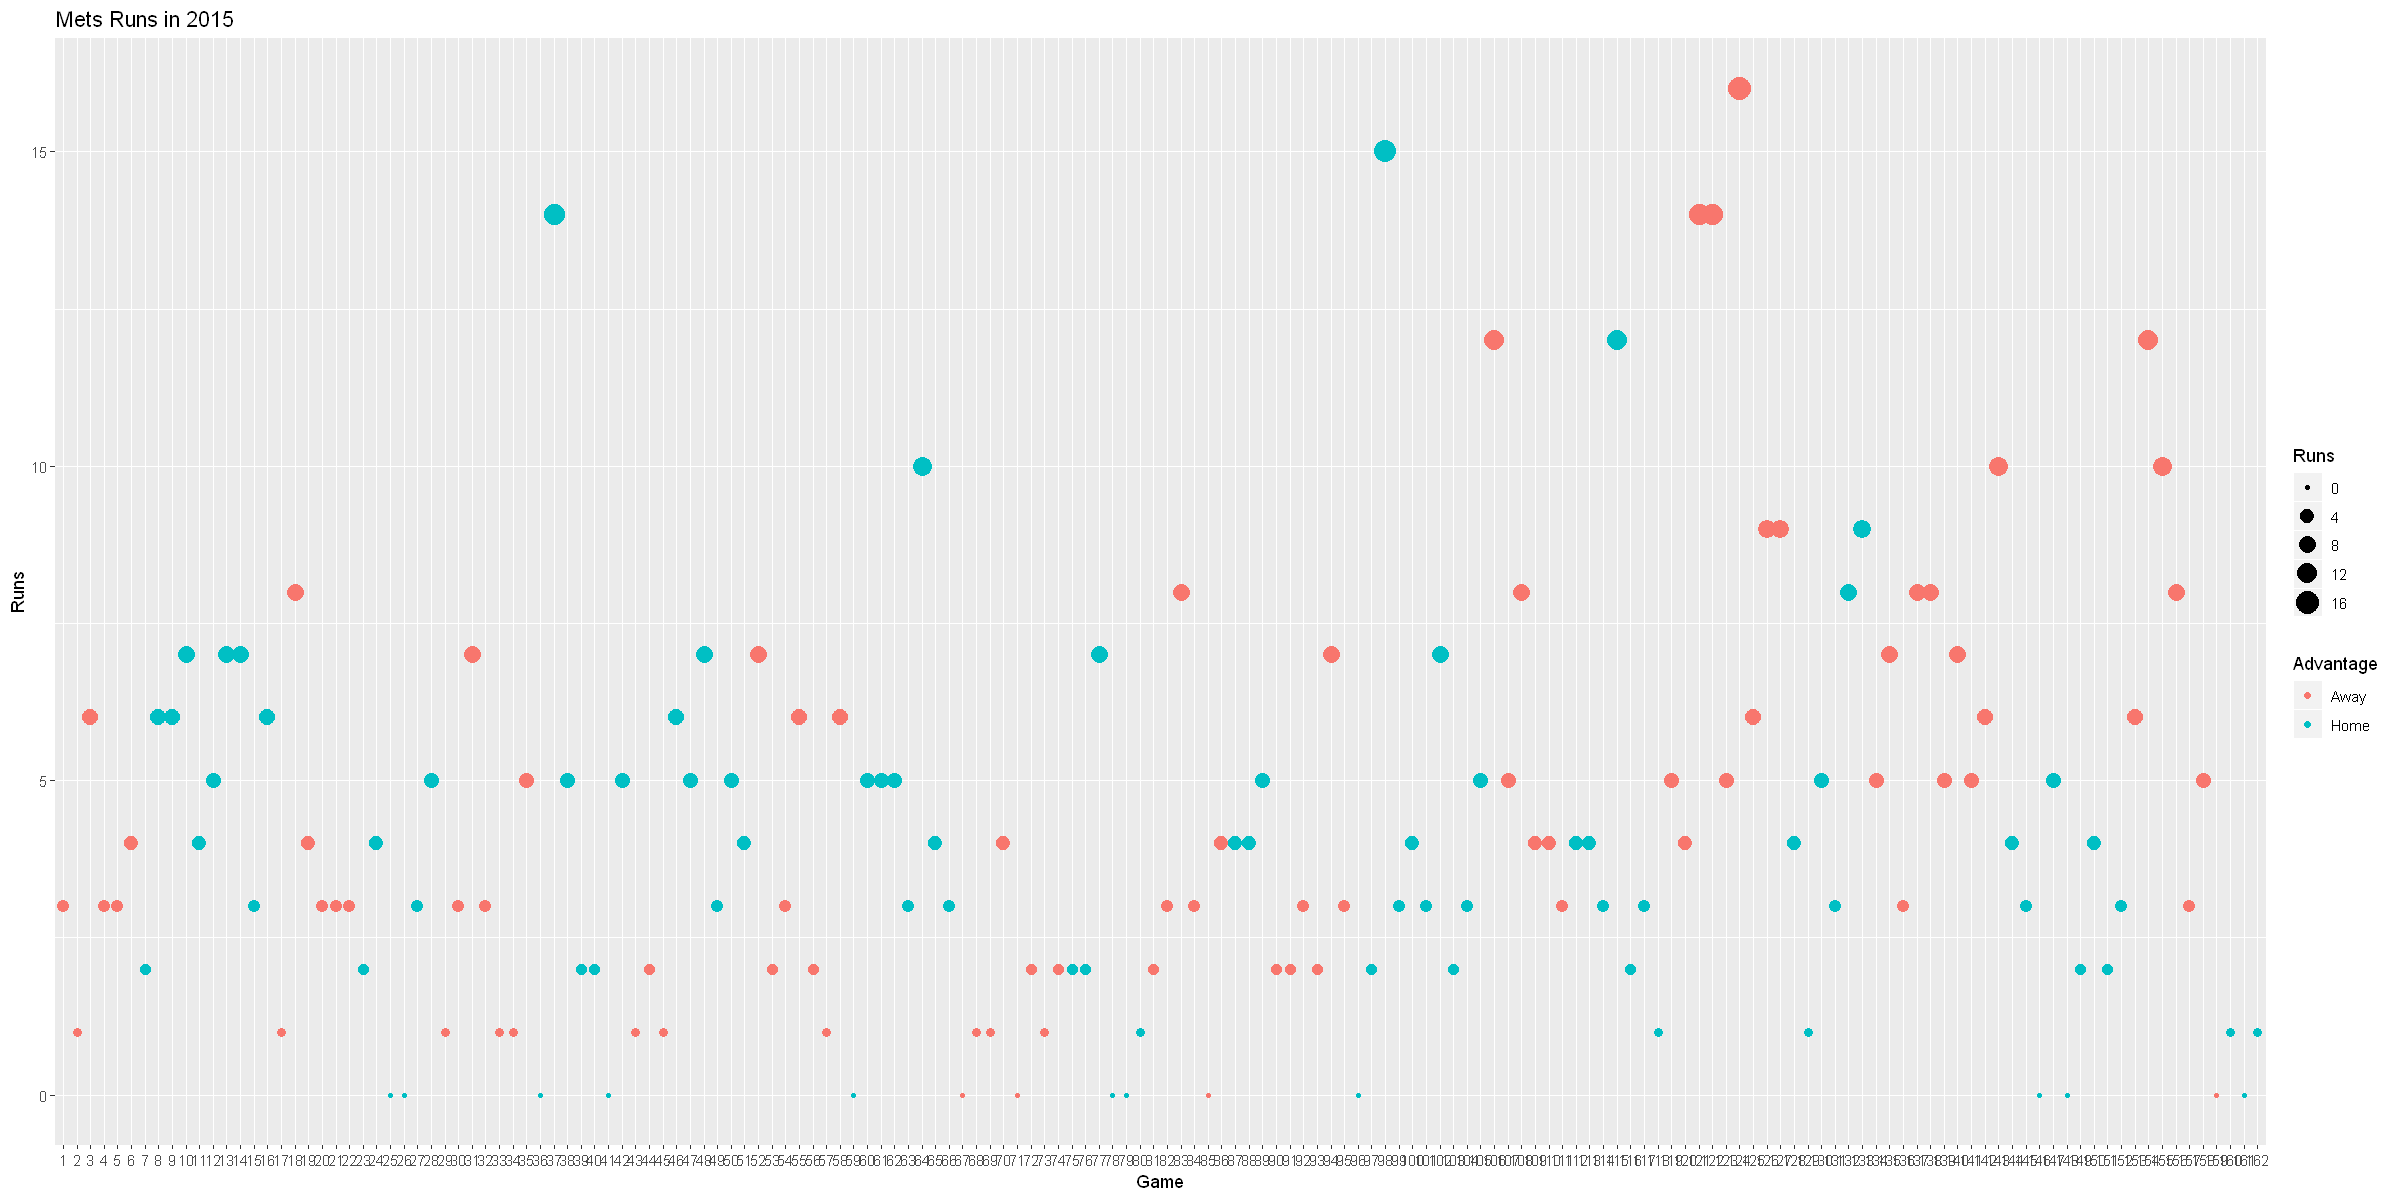

In [54]:
options(repr.plot.width=20, repr.plot.height=10)

df %>%
    ggplot(aes(x=Game, y=Runs, color=Advantage))+
    geom_point(aes(size=Runs))+
    ggtitle("Mets Runs in 2015")

## Run actual analyses

In [66]:
runsAtt<- aov(Runs~Opp, data=df)
summary(runsAtt)

             Df Sum Sq Mean Sq F value  Pr(>F)   
Opp          18  376.9  20.941   2.268 0.00405 **
Residuals   143 1320.5   9.234                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [67]:
TukeyHSD(runsAtt)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Runs ~ Opp, data = df)

$Opp
               diff         lwr         upr     p adj
ATL-ARI  0.52631579  -4.2883775  5.34100909 1.0000000
BAL-ARI  0.25000000  -6.5753527  7.07535274 1.0000000
BOS-ARI -0.66666667  -8.1811327  6.84779939 1.0000000
CHC-ARI -2.42857143  -8.2492518  3.39210895 0.9923691
CIN-ARI  2.71428571  -3.1063947  8.53496609 0.9753275
COL-ARI  4.00000000  -1.8206804  9.82068038 0.5888911
LAD-ARI  0.71428571  -5.1063947  6.53496609 1.0000000
MIA-ARI  0.78947368  -4.0252196  5.60416699 1.0000000
MIL-ARI  0.00000000  -6.0583562  6.05835622 1.0000000
NYY-ARI -0.66666667  -6.7250229  5.39168955 1.0000000
PHI-ARI  1.84210526  -2.9725880  6.65679857 0.9972186
PIT-ARI -2.33333333  -8.3916896  3.72502288 0.9969874
SDP-ARI  0.33333333  -5.7250229  6.39168955 1.0000000
SFG-ARI -1.16666667  -7.2250229  4.89168955 0.9999999
STL-ARI -1.71428571  -7.5349661  4.10639466 0.9999130
TBR-ARI -0.3

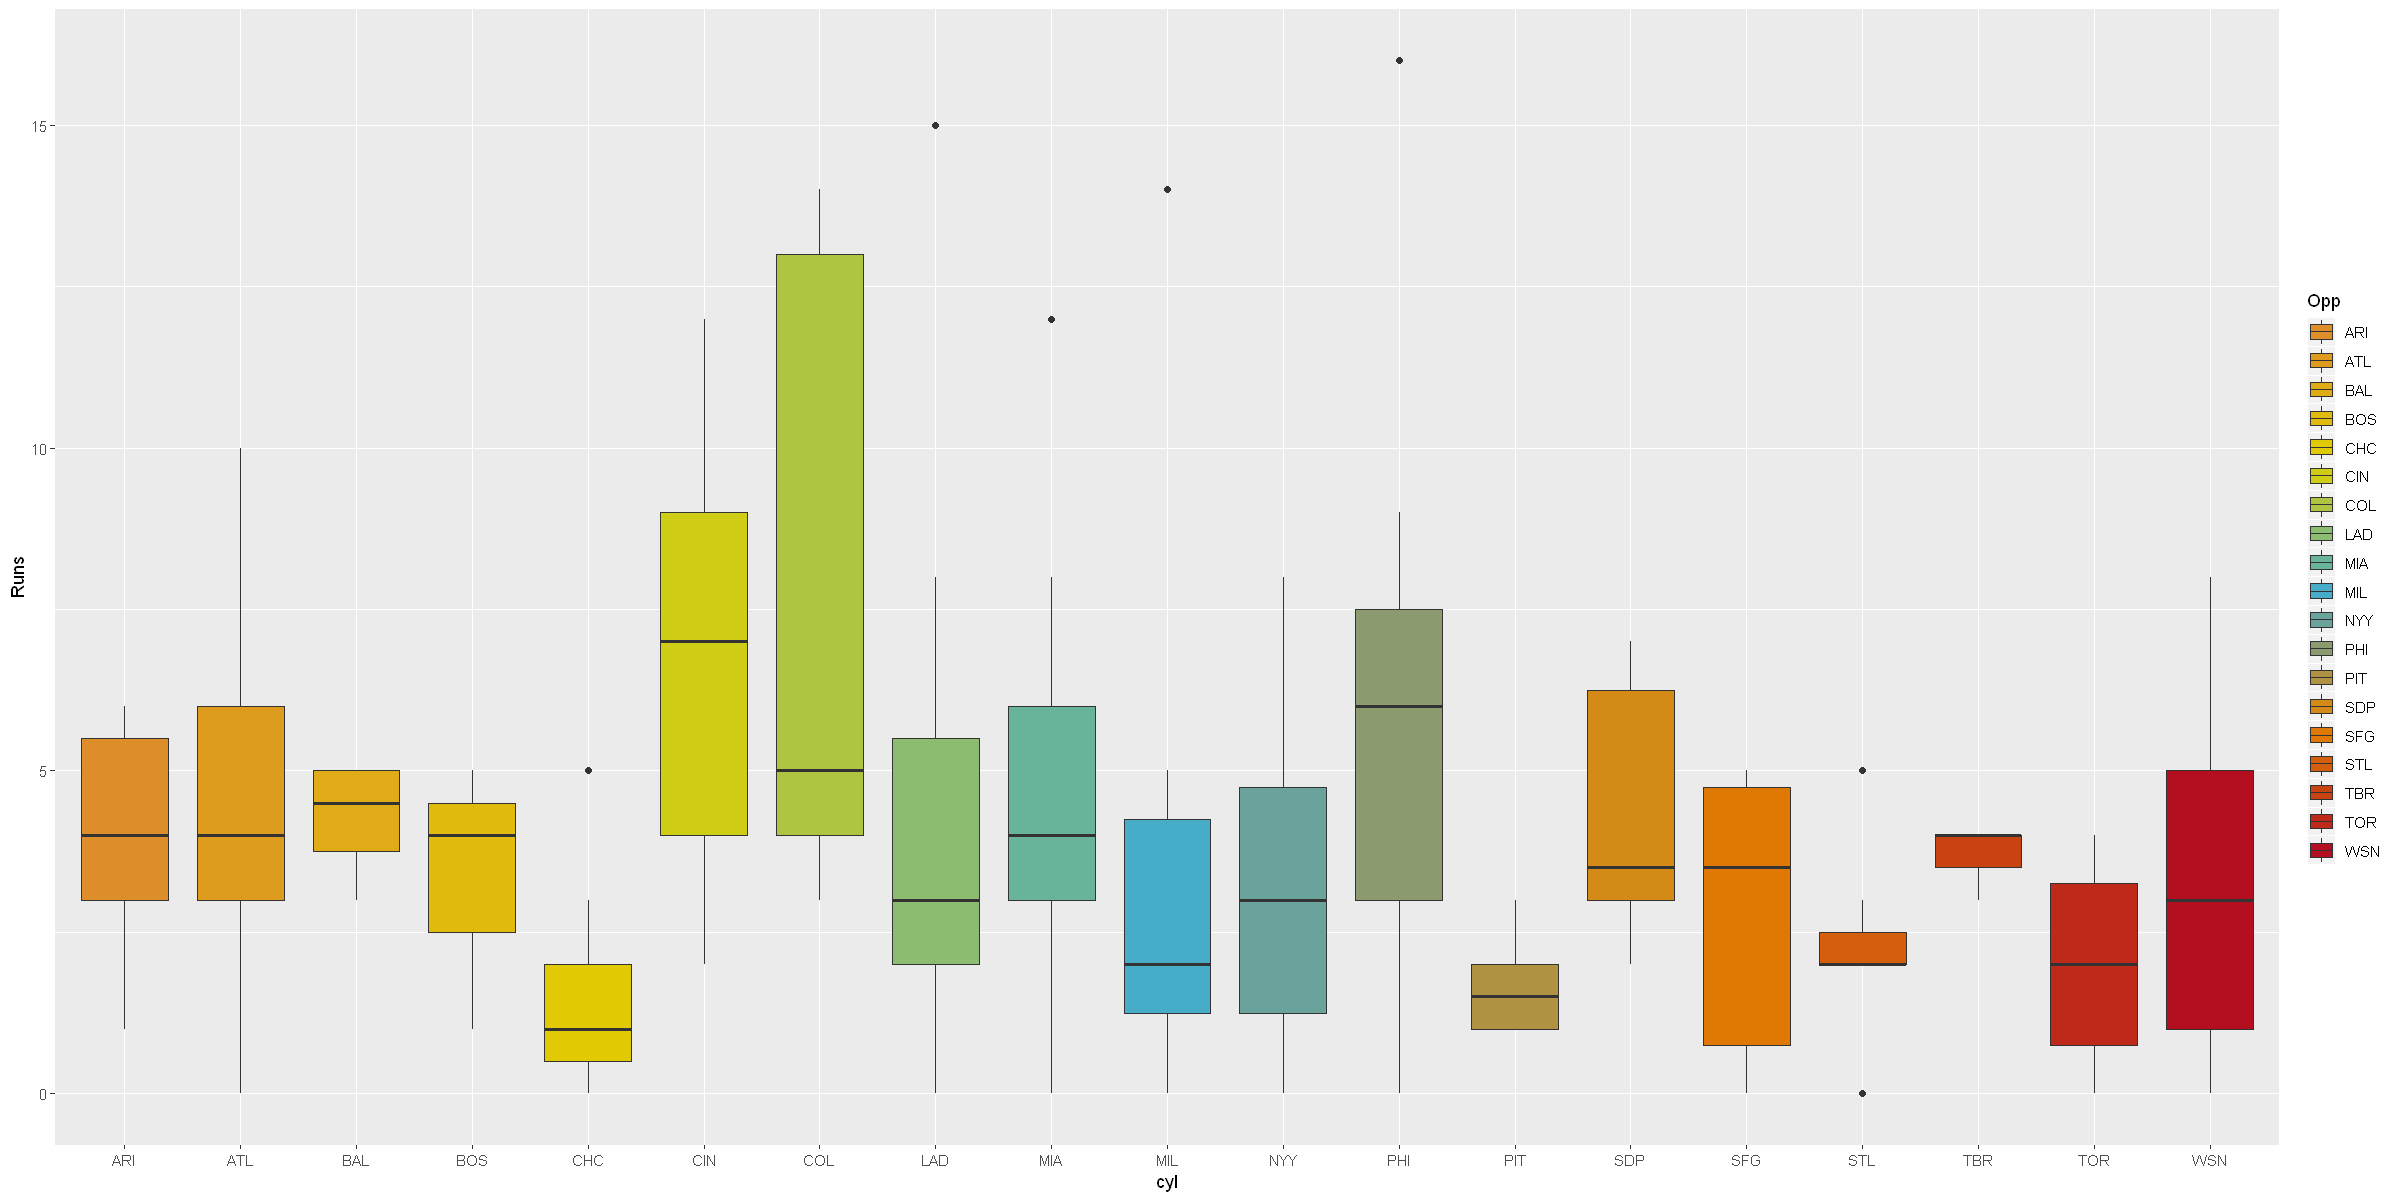

In [76]:
pal <- wes_palette("FantasticFox1", 19, type = "continuous")

ggplot(df, aes(x=as.factor(Opp), y=Runs, fill=Opp)) + 
    geom_boxplot() + 
    xlab("cyl")+
    scale_fill_manual(values = pal)